In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys, os
sys.path.insert(0, "/home/storage/hans/jax_reco_new")
from lib.plotting import adjust_plot_1d

In [2]:
def get_zen_azi(results):
    scale = 100.0
    reco_zenith, reco_azimuth = results[:, -6]/scale, results[:, -5]/scale
    track_src_v = results[:, 2:4]
    true_zenith, true_azimuth = track_src_v[:, 0], track_src_v[:, 1]
    smpe_zenith, smpe_azimuth = results[:, 8], results[:, 9]
    return track_src_v[:, 0], track_src_v[:, 1], reco_zenith, reco_azimuth, smpe_zenith, smpe_azimuth

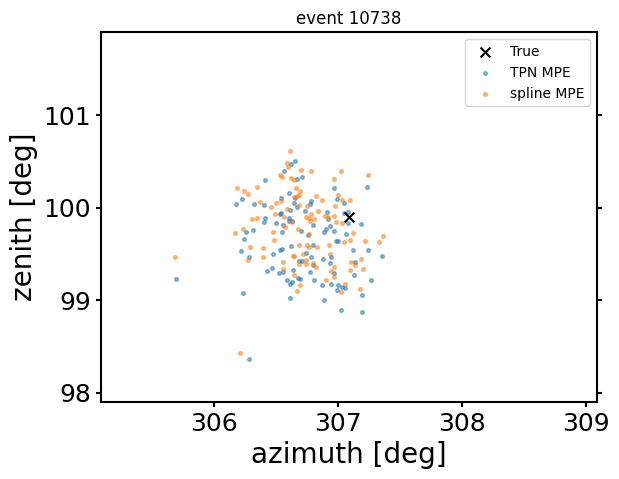

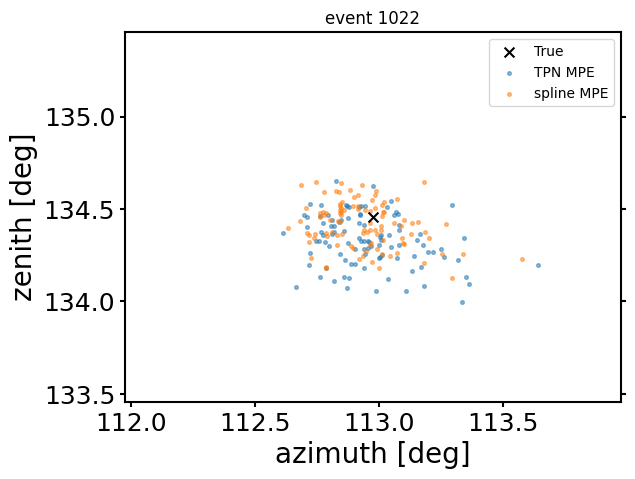

In [5]:
for event_id, d_zen in zip(['10738', '1022'], [2.0, 1.0]):
    dat = np.load(f'/home/storage/hans/jax_reco_new/examples/reco_realtime/update/reco_result_{event_id}_tfrecord.npy')
    
    true_zen, true_azi, reco_zen, reco_azi, smpe_zen, smpe_azi = get_zen_azi(dat)
    
    fig, ax = plt.subplots()
    plt.scatter(np.rad2deg(true_azi)[0:1], np.rad2deg(true_zen)[0:1], marker='x', color='black', label='True', s=50, zorder=5)
    plt.scatter(np.rad2deg(reco_azi), np.rad2deg(reco_zen), label='TPN MPE', s=7, color='tab:blue', alpha=0.5)
    plt.scatter(np.rad2deg(smpe_azi), np.rad2deg(smpe_zen), label='spline MPE', s=7, color='tab:orange', alpha=0.5)
    
    plt.legend()
    plt.xlim()
    plt.ylim()
    
    plot_args = {'xlabel':'azimuth [deg]', 
                     'ylabel':'zenith [deg]', 
                     'xlim':[np.rad2deg(true_azi[0])-d_zen, np.rad2deg(true_azi[0])+d_zen], 
                     'ylim':[np.rad2deg(true_zen[0])-d_zen, np.rad2deg(true_zen[0])+d_zen]}
    adjust_plot_1d(fig, ax, plot_args=plot_args)
    plt.title(f"event {event_id}")
    plt.show()